In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

import torch.nn as nn
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

from matplotlib import pyplot as plt

from tqdm import tqdm

from botorch.test_functions.synthetic import Ackley

c:\Users\danin\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import sys
sys.path.append('../')
from vae import Autoencoder, WeightedAutoencoder

In [3]:
x = torch.FloatTensor(50, 10).uniform_(0, 5)
x2 = torch.FloatTensor(50, 10).uniform_(25, 32)
x = torch.concat((x,x2))

In [4]:
funct = Ackley(dim=10, noise_std=None, negate=False, bounds=None, dtype=torch.float64)
y = funct(x)
y

tensor([11.2360, 11.6972, 10.5675, 10.3829, 11.8648, 12.1682,  9.8991, 10.7656,
        11.7545, 10.4754, 12.2122, 10.4937, 11.1280, 10.4246, 11.2093,  9.7270,
        10.0802, 10.9499,  8.8385, 12.1112,  9.7960, 11.3796,  9.7980, 11.1993,
         8.2347, 10.2649,  9.0090,  9.9115, 10.6021, 10.2951, 11.4985,  9.4852,
        10.7314, 11.1230,  8.2506, 10.6582, 11.4218, 10.0981, 10.0170, 11.5994,
         9.8487, 11.1335, 10.6467, 11.2335, 11.1622, 10.1778, 10.7068, 10.6810,
        10.7667, 11.6665, 21.5021, 21.5159, 21.3461, 21.7462, 21.3005, 21.6874,
        21.5621, 21.4991, 21.2769, 21.8396, 21.7169, 21.6663, 21.2771, 21.5559,
        21.0347, 21.7659, 21.4929, 21.3263, 21.5501, 21.2434, 20.9463, 21.5517,
        21.5856, 21.8546, 21.7651, 21.6061, 21.3194, 21.3874, 21.4274, 21.1296,
        21.9690, 21.5658, 20.9665, 21.8197, 21.6207, 21.6854, 21.0543, 21.6386,
        21.3637, 21.1106, 21.2890, 21.6677, 21.6957, 21.8378, 21.0553, 21.7367,
        21.8422, 21.5800, 21.7250, 21.66

d:\Downloads\Github\ict-f0ntys-internship\example_use\..\vae.py:237: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X, dtype=torch.float32)


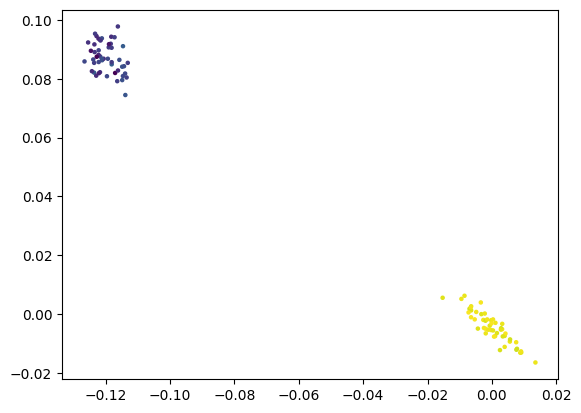

In [5]:
vae = WeightedAutoencoder()
vae_result = vae.fit_transform(x, y, optim_direc=['max'])
vae_result
plt.scatter(vae_result[:, 0], vae_result[:, 1], c=y, cmap='viridis', s=5)

In [6]:
x_pred = vae.inverse_transform(vae_result)
r2_score(x, x_pred)

-0.14843924343585968

d:\Downloads\Github\ict-f0ntys-internship\example_use\..\vae.py:83: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X, dtype=torch.float32)
d:\Downloads\Github\ict-f0ntys-internship\example_use\..\vae.py:119: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X, dtype=torch.float32)
C:\Users\danin\AppData\Local\Temp\ipykernel_29024\800334216.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(vae_result[:, 0], vae_result[:, 1], cmap='viridis', s=5)


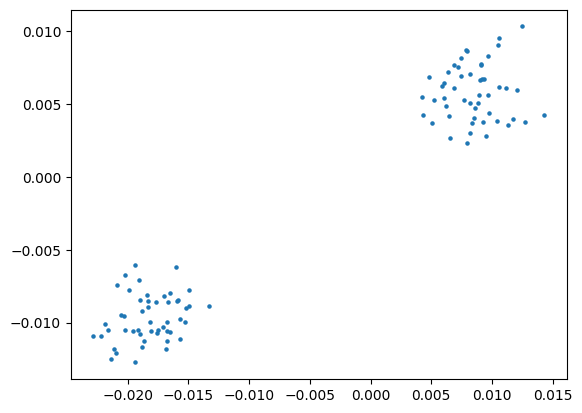

In [7]:
vae = Autoencoder()
vae_result = vae.fit_transform(x)
vae_result
plt.scatter(vae_result[:, 0], vae_result[:, 1], cmap='viridis', s=5)

In [8]:
x_pred = vae.inverse_transform(vae_result)
r2_score(x, x_pred)

-0.0011136650573462248